# Importaciones

In [ ]:
#@title Las librerias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
#@title Los archivos desde github

tcd = pd.read_csv('https://raw.githubusercontent.com/marquezlucas/ds/main/customer_details.csv')
tec = pd.read_csv('https://raw.githubusercontent.com/marquezlucas/ds/main/E-commerece%20sales%20data%202024.csv')
tpd = pd.read_csv('https://raw.githubusercontent.com/marquezlucas/ds/main/product_details.csv')


# Investigo las tablas


##tabla_customer_details

In [ ]:
tcd.shape

(3900, 18)

In [ ]:
tcd.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [ ]:
tcd.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


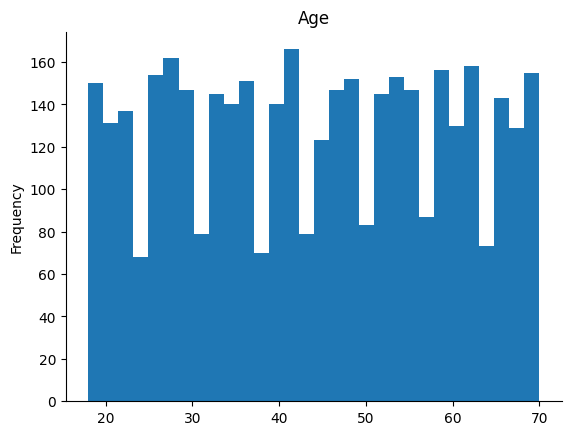

In [ ]:
# @title Age

tcd['Age'].plot(kind='hist', bins=30, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

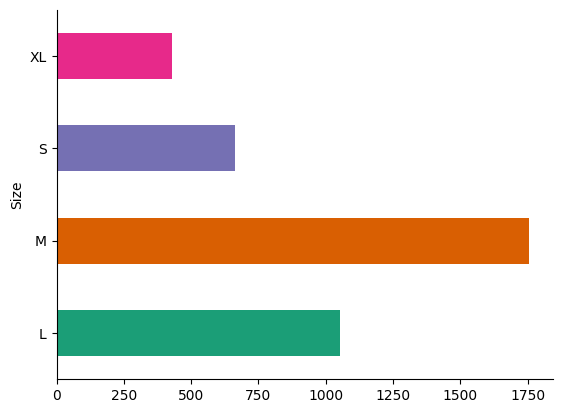

In [ ]:
# @title Size type

# Busco algún tipo de diferencia entre las diferentes segmentaciones dentro de la columna 'Interaction type'
tcd.groupby('Size').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

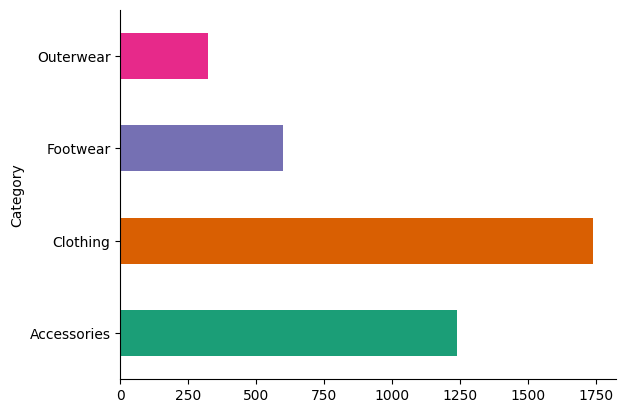

In [ ]:
# @title Category type

# Busco algún tipo de diferencia entre las diferentes segmentaciones dentro de la columna 'Interaction type'
tcd.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

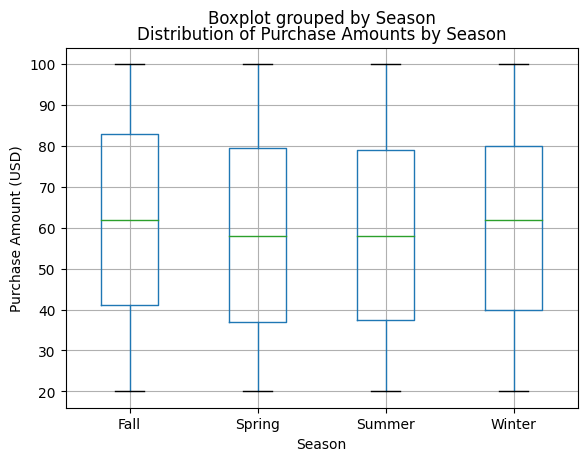

In [ ]:
# @title Distribution of Purchase Amounts by Season

tcd.boxplot(column='Purchase Amount (USD)', by='Season')
plt.title('Distribution of Purchase Amounts by Season')
plt.xlabel('Season')
_ = plt.ylabel('Purchase Amount (USD)')

###Veo cuanta es la cantidad de nulos

In [ ]:
# Calculo la cantidad de valores nulos por columna
tcd_nulos_por_columna = tcd.isnull().sum()

# Muestra la cantidad de nulos por columna
print(tcd_nulos_por_columna)

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


##tabla_e_commerce

In [ ]:
tec.shape

(3294, 5)

In [ ]:
tec.columns

Index(['user id', 'product id', 'Interaction type', 'Time stamp',
       'Unnamed: 4'],
      dtype='object')

In [ ]:
tec.tail()

,user id,product id,Interaction type,Time stamp,Unnamed: 4
3289,NaN,NaN,NaN,NaN,NaN
3290,NaN,NaN,NaN,NaN,NaN
3291,NaN,NaN,NaN,NaN,NaN
3292,NaN,NaN,NaN,NaN,NaN
3293,NaN,NaN,NaN,NaN,NaN


In [ ]:
#como me trajo varios nulos utilizo sample para ver si puedo encontrar otra muestra que me de más información
tec.sample(10)

,user id,product id,Interaction type,Time stamp,Unnamed: 4
1621,1622.0,6e03fad40bcb0ae6e3497083a7318209,view,23/10/2023 8:00,NaN
2478,2479.0,c0397be8b395de0e9ca8e85490534b93,like,25/10/2023 8:00,NaN
2559,2560.0,a94c6e8e9c669cfc77d139171a6fdd40,like,12/01/2023 10:00,NaN
1507,1508.0,f46efb904f563ef4177d0394b034738d,view,18/10/2023 8:00,NaN
123,124.0,b7bb0de40b81beb68392cb9eac930137,like,24/10/2023 8:00,NaN
48,49.0,4f41e104e3332ef045a90d8a294ffbd5,like,27/11/2023 8:00,NaN
1354,1355.0,a3316c66f7b53f7202ccd7fcc4f42709,purchase,29/12/2022 10:00,NaN
3066,NaN,NaN,NaN,NaN,NaN
1331,1332.0,898720b304a83ed1dbb0511606a221a5,purchase,08/12/2023 8:00,NaN
2863,2864.0,bf6f6fd48e4a986b6eddef6cae25487d,purchase,23/11/2023 8:00,NaN


In [ ]:
tec.values

array([[1.0, '4c69b61db1fc16e7013b43fc926e502d', 'purchase',
        '10/10/2023 8:00', nan],
       [2.0, '66d49bbed043f5be260fa9f7fbff5957', 'view',
        '11/10/2023 8:00', nan],
       [3.0, '2c55cae269aebf53838484b0d7dd931a', 'like',
        '12/10/2023 8:00', nan],
       ...,
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan]], dtype=object)

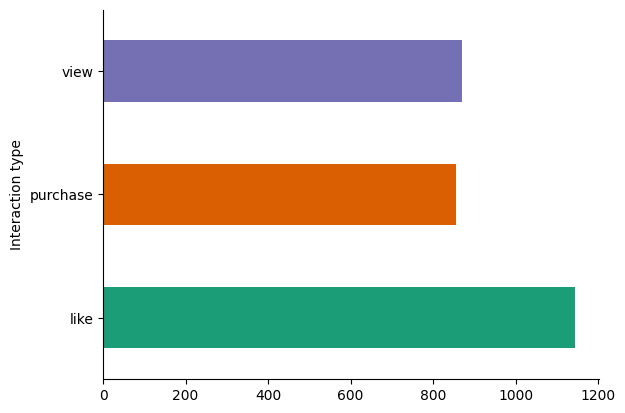

In [ ]:
# @title Interaction type

# Busco algún tipo de diferencia entre las diferentes segmentaciones dentro de la columna 'Interaction type'
tec.groupby('Interaction type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

###Veo cuanta es la cantidad de nulos

In [ ]:
# Calculo la cantidad de valores nulos por columna
tec_nulos_por_columna = tec.isnull().sum()

# Muestra la cantidad de nulos por columna
print(tec_nulos_por_columna)

user id              295
product id           295
Interaction type     423
Time stamp           295
Unnamed: 4          3294
dtype: int64


##tabla_product_details

In [ ]:
tpd.shape

(10002, 28)

In [ ]:
tpd.columns

Index(['Uniqe Id', 'Product Name', 'Brand Name', 'Asin', 'Category',
       'Upc Ean Code', 'List Price', 'Selling Price', 'Quantity',
       'Model Number', 'About Product', 'Product Specification',
       'Technical Details', 'Shipping Weight', 'Product Dimensions', 'Image',
       'Variants', 'Sku', 'Product Url', 'Stock', 'Product Details',
       'Dimensions', 'Color', 'Ingredients', 'Direction To Use',
       'Is Amazon Seller', 'Size Quantity Variant', 'Product Description'],
      dtype='object')

In [ ]:
tpd.sample(10)

,Uniqe Id,Product Name,Brand Name,Asin,Category,Upc Ean Code,List Price,Selling Price,Quantity,Model Number,...,Product Url,Stock,Product Details,Dimensions,Color,Ingredients,Direction To Use,Is Amazon Seller,Size Quantity Variant,Product Description
9665,8b6a4e034fcc5b22ee8323b5b463bdc1,Hallmark Light Pink Fluffy Plush Peanuts Snoopy,NaN,NaN,Toys & Games | Stuffed Animals & Plush Toys | ...,NaN,NaN,$9.99,NaN,6MJB3194,...,https://www.amazon.com/Hallmark-Light-Fluffy-P...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
2459,74de4c82bd6e18f176e5a6c2ffe84230,"Oeuf Play Table, White",NaN,NaN,Home & Kitchen | Furniture | Kids' Furniture |...,NaN,NaN,$490.00,NaN,NaN,...,https://www.amazon.com/Oeuf-1PYT01-Play-Table-...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
9646,6836e17af240a35a9a4c51587a2f1f73,"Hedstrom DreamWorks Trolls Hopper Ball, Hop Ba...",NaN,NaN,Toys & Games | Novelty & Gag Toys,NaN,NaN,$17.24,NaN,55-9720,...,https://www.amazon.com/Hedstrom-DreamWorks-Tro...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
5634,ecf75a89824d598e960ec169f4fe5c95,WordSpiel Card Game,NaN,NaN,Toys & Games | Games & Accessories | Card Games,NaN,NaN,$11.95,NaN,3000-1,...,https://www.amazon.com/SET-Enterprises-3000-1-...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
1567,1c8dd11c19874edb2d7492188ba8d3ba,Rose Art LAUR DIY Letter Board Kit,NaN,NaN,Toys & Games | Arts & Crafts | Craft Kits,NaN,NaN,$19.99,NaN,FYH53,...,https://www.amazon.com/LAUR-DIY-Letter-Board-K...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
3877,35c2416e8e2e4ed489778df678feb6fe,Ravensburger 16221 Ice Cream Shop 1500 Piece P...,NaN,NaN,Toys & Games | Puzzles | Jigsaw Puzzles,NaN,NaN,$25.16,NaN,16221,...,https://www.amazon.com/Neuschwanstein-Impressi...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
5610,b0e281b5610b095764b52c50247e4e62,Mudpuppy Transportation Puzzle Sticks – Great ...,NaN,NaN,Toys & Games | Puzzles,NaN,NaN,$13.99,NaN,9.78074E+12,...,https://www.amazon.com/Mudpuppy-Transportation...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
167,f4d3330e05b15674aa1f2c5b4d044cd4,Carrera 23856 Ferrari 512 S Berlinetta Scuderi...,NaN,NaN,"Toys & Games | Hobbies | Slot Cars, Race Track...",NaN,NaN,$75.01,NaN,23856,...,https://www.amazon.com/Carrera-23856-Ferrari-S...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
2043,346f1ebfb7f9f9d94ed01f175e4a14f2,"Educational Insights Hot Dots Talking Pen, Sin...",NaN,NaN,Toys & Games | Learning & Education,NaN,NaN,$9.09,NaN,2570,...,https://www.amazon.com/Educational-Insights-Ta...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
7245,8cb6ffe8be3e70d69eba537b4878724c,Disney Lilo & Stitch Fan Buddy Key Ring,NaN,NaN,Toys & Games | Novelty & Gag Toys,NaN,NaN,$6.99,NaN,85159,...,https://www.amazon.com/Disney-Lilo-Stitch-Budd...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN


from matplotlib import pyplot as plt
import seaborn as sns
_df_18.groupby('Variants').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

###Veo cuanta es la cantidad de nulos

In [ ]:
# Calculo la cantidad de valores nulos por columna
tpd_nulos_por_columna = tpd.isnull().sum()

# Muestra la cantidad de nulos por columna
print(tpd_nulos_por_columna)

Uniqe Id                     0
Product Name                 0
Brand Name               10002
Asin                     10002
Category                   830
Upc Ean Code              9968
List Price               10002
Selling Price              107
Quantity                 10002
Model Number              1772
About Product              273
Product Specification     1632
Technical Details          790
Shipping Weight           1138
Product Dimensions        9523
Image                        0
Variants                  7524
Sku                      10002
Product Url                  0
Stock                    10002
Product Details          10002
Dimensions               10002
Color                    10002
Ingredients              10002
Direction To Use         10002
Is Amazon Seller             0
Size Quantity Variant    10002
Product Description      10002
dtype: int64


#MERGE

##Genero la union de las tres tablas por medio de la tabla e_commerce que contiene las columnas 'user id' y 'product id'.

*   Conecto con la tabla "customer_details" por medio de la columna 'Customer ID'
*   Conecto con la tabla "product_details" por medio de la columna 'Uniqe Id'
## Utilizo la union outter para traerme todos los datos y despues poder analizar todos en conjunto.

In [ ]:
#Genero la union de las tres tablas por medio de la tabla e_commerce que contiene las columnas 'user id', 'product id'